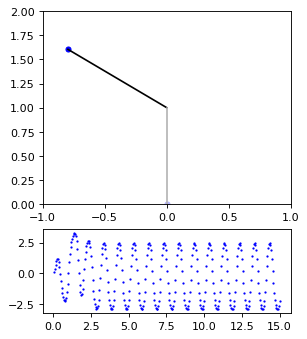

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from IPython import display

# Function to get acceleration of the pendulum, based off of Newtonian Mechanics and torque calculation. The variable 'alpha'
#  refers to the angular acceleration of the angle phi between the vertical and the pendulum's string.
def acc(beta,omega,w0,w,gamma,phi,t):
    alpha = -2*beta*omega - w0**2 * math.sin(phi) + gamma*w0**2 * math.cos(w*t);
    
    return alpha;

def main():
    
    # defining necessary variables for the simulation. 
    t = 0;
    tf = 15;
    dt = 0.05;
    N = int(np.ceil(tf/dt));
    plotRealTime = True;
    
    
    # defining the physical variables.
    phi = 0;
    
    x1 = math.sin(phi);
    
    y1 = 1 - math.cos(phi);
    
    g = 9.8;
    beta = 3*math.pi/4;
    w0 = 3*math.pi;
    gamma = 0.99; #drive strength
    w = 2*math.pi;
    
    # object is released at rest.
    omega = 0;
    
    alpha = acc(beta,omega,w0,w,gamma,phi,t);
    
    # creating the plots and turning interactive plotting on to animate our results.
    plt.ion();
    fig = plt.figure(figsize=(4,5), dpi=80);
    grid = plt.GridSpec(3, 1, wspace=0.0, hspace=0.3);
    ax1 = plt.subplot(grid[0:2,0]);
    ax2 = plt.subplot(grid[2,0]);
    
    for i in range(N):
        
        # updating 'phi' based on the acceleration function created above and using the leapfrog integration 
        # technique.
        phi += omega*dt + 0.5*alpha*dt**2;
        omega += alpha*dt/2.0;
        
        alpha = acc(beta,omega,w0,w,gamma,phi,t);
        omega += alpha*dt/2.0;
        t += dt;
        
        x1 = math.sin(phi);
        
        y1 = 1 - math.cos(phi);
        
        if plotRealTime or (i == N-1):
            
            # clear graphs for every iteration and plot the positions of the pendulums (with the strings drawn)
            # the position is plotted as 'y' vs. 'x'.
            plt.sca(ax1);
            plt.cla();
            
            px1 = [0,x1];
            py1 = [1,y1];
            
            plt.plot(px1, py1, color = 'black');
            plt.plot([0,0], [1,0], color = [0.7,0.7,0.7]);
            
            plt.scatter(0,0,color=[0.7,0.7,1],s=20);
            plt.scatter(x1,y1,color='blue',s=20);
            ax1.set(xlim=(-1, 1), ylim=(0, 2));
#             ax1.set_aspect('equal', 'box');
#             ax1.set_xticks([1]);
#             ax1.set_yticks([3,4,5]);
            
            # graph the second plot of'phi' with respect to time.
            plt.sca(ax2);
            plt.scatter(t,phi,color='blue',s=1);
            
            # the part of the code that animates results rather than plotting a graph for each iteration of the 'for' loop.
            display.display(plt.gcf());
            display.clear_output(wait=True);
            fig.canvas.draw();
            fig.canvas.flush_events();
    return 0;

if __name__== "__main__":
    main()